## **1. Data Collection**

In [1]:


# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Define parameters for data collection
crypto_ticker = 'BTC-USD'  # For example, Bitcoin in USD
start_date = '2021-01-01'
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Fetch crypto OHLC data using yfinance
crypto_data = yf.download(crypto_ticker, start=start_date, end=end_date)
print("Crypto data fetched:")
print(crypto_data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Crypto data fetched:
Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2021-01-01  29374.152344  29600.626953  28803.585938  28994.009766   
2021-01-02  32127.267578  33155.117188  29091.181641  29376.455078   
2021-01-03  32782.023438  34608.558594  32052.316406  32129.408203   
2021-01-04  31971.914062  33440.218750  28722.755859  32810.949219   
2021-01-05  33992.429688  34437.589844  30221.187500  31977.041016   

Price            Volume  
Ticker          BTC-USD  
Date                     
2021-01-01  40730301359  
2021-01-02  67865420765  
2021-01-03  78665235202  
2021-01-04  81163475344  
2021-01-05  67547324782  


In [2]:
# Collect news data using News API

NEWS_API_KEY = '529c68c003d9497e8492c33fcf5d82c8'
BASE_URL = "https://newsapi.org/v2/everything"
params = {
    "q": "crypto",
    # "from": datetime.today().strftime("%Y-%m-%d"),
    "sortBy": "publishedAt",
    "apiKey": NEWS_API_KEY
}

response = requests.get(BASE_URL, params=params)
news_data = response.json()
news_articles = news_data.get('articles', [])
news_df = pd.DataFrame(news_articles)

In [3]:
news_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Decrypt'}",Sander Lutz,Trump’s Crypto Conflicts Dominate Stablecoin L...,"Capitol Hill sources say, though, that the pus...",https://decrypt.co/312993/trump-crypto-stablec...,https://cdn.decrypt.co/resize/1024/height/512/...,2025-04-02T20:04:05Z,A House Financial Services Committee markup of...
1,"{'id': None, 'name': 'The Daily Hodl'}",Conor Devitt,Coinbase Says FDIC Not Cooperating With Exchan...,Coinbase’s legal representatives say the U.S. ...,https://dailyhodl.com/2025/04/02/coinbase-says...,https://dailyhodl.com/wp-content/uploads/2025/...,2025-04-02T20:00:08Z,Coinbase’s legal representatives say the U.S. ...
2,"{'id': None, 'name': 'newsBTC'}",Scott Matherson,Ethereum Pain Is Far From Over: Why A Massive ...,Crypto analyst Klejdi has indicated that Ether...,http://www.newsbtc.com/news/ethereum/ethereum-...,https://www.newsbtc.com/wp-content/uploads/202...,2025-04-02T20:00:03Z,Strict editorial policy that focuses on accura...
3,"{'id': None, 'name': 'Activistpost.com'}",Editor,Technocracy Ascending – Part 4: All the Presid...,"In Technocracy Ascending Part 3, the dots were...",https://www.activistpost.com/technocracy-ascen...,https://www.activistpost.com/wp-content/upload...,2025-04-02T20:00:00Z,"In Technocracy Ascending Part 3, the dots were..."
4,"{'id': None, 'name': 'The Daily Hodl'}",Mehron Rokhy,Robinhood CEO Vlad Tenev Says Crypto Tokenizat...,The chief executive of retail trading giant Ro...,https://dailyhodl.com/2025/04/02/robinhood-ceo...,https://dailyhodl.com/wp-content/uploads/2024/...,2025-04-02T19:55:11Z,The chief executive of retail trading giant Ro...


In [4]:
# ========================
# 2. Data Preprocessing & Feature Engineering
# ========================

# Calculate Technical Indicators for crypto_data
def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

def calculate_ema(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add technical indicators to crypto_data DataFrame
crypto_data['SMA_20'] = calculate_sma(crypto_data, 20)
crypto_data['EMA_20'] = calculate_ema(crypto_data, 20)
crypto_data['RSI'] = calculate_rsi(crypto_data)

# Drop rows with missing values (if any)
crypto_data.dropna(inplace=True)
print("Technical indicators added:")
crypto_data.head()


Technical indicators added:


Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
Date,,,,,,,,
2021-01-20,35547.750000,36378.328125,33570.476562,36050.113281,66834573161,35944.375488,35414.784907,47.021356
2021-01-21,30825.699219,35552.679688,30250.750000,35549.398438,75643067688,36016.952832,34977.729127,31.899143
2021-01-22,33005.761719,33811.851562,28953.373047,30817.625000,77207272511,36060.877539,34789.922707,34.005765
2021-01-23,32067.642578,33360.976562,31493.160156,32985.757812,48354737975,36025.158496,34530.657933,33.463043
2021-01-24,32289.378906,32944.007812,31106.685547,32064.376953,48643830599,36041.031738,34317.202787,36.854735


In [5]:
# ========================
# 3. Sentiment Analysis on News Data
# ========================

# Use Hugging Face's Transformers to perform sentiment analysis on news headlines
# Install transformers with: pip install transformers torch (if not already installed)
from transformers import pipeline

# Initialize sentiment analysis pipeline (you can choose a model specifically fine-tuned for crypto sentiment if available)
sentiment_model = pipeline("sentiment-analysis", model="ProsusAI/finbert")

# Apply sentiment analysis to news headlines
def analyze_sentiment(headline):
    result = sentiment_model(headline)[0]
    return result['label'], result['score']

# Create new columns in news_df for sentiment label and score
news_df = news_df.dropna(subset=['title'])
news_df[['sentiment', 'sentiment_score']] = news_df['title'].apply(lambda x: pd.Series(analyze_sentiment(x)))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [6]:
!pip install keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 779.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [7]:
from keybert import KeyBERT


model = KeyBERT('distilbert-base-nli-mean-tokens')


def extract_keywords(text,  num_keywords=20):
    keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=num_keywords)
    return [kw[0] for kw in keywords]


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.80k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:

keywords_column = []
i = 1
for text in news_df['content']:
    n_keywords = (len(text)//10)%100
    # print(f"Extracting {n_keywords} keywords from article {i}")
    i += 1
    keywords = extract_keywords(text, n_keywords)
    if keywords:
        keywords_column.append(keywords)
    else:
        keywords_column.append([])


news_df['Keywords'] = keywords_column

Extracting 21 keywords from article 1
Extracting 21 keywords from article 2
Extracting 21 keywords from article 3
Extracting 21 keywords from article 4
Extracting 21 keywords from article 5
Extracting 16 keywords from article 6
Extracting 21 keywords from article 7
Extracting 21 keywords from article 8
Extracting 21 keywords from article 9
Extracting 21 keywords from article 10
Extracting 21 keywords from article 11
Extracting 21 keywords from article 12
Extracting 21 keywords from article 13
Extracting 21 keywords from article 14
Extracting 21 keywords from article 15
Extracting 21 keywords from article 16
Extracting 21 keywords from article 17
Extracting 21 keywords from article 18
Extracting 21 keywords from article 19
Extracting 21 keywords from article 20
Extracting 21 keywords from article 21
Extracting 21 keywords from article 22
Extracting 21 keywords from article 23
Extracting 21 keywords from article 24
Extracting 21 keywords from article 25
Extracting 21 keywords from articl

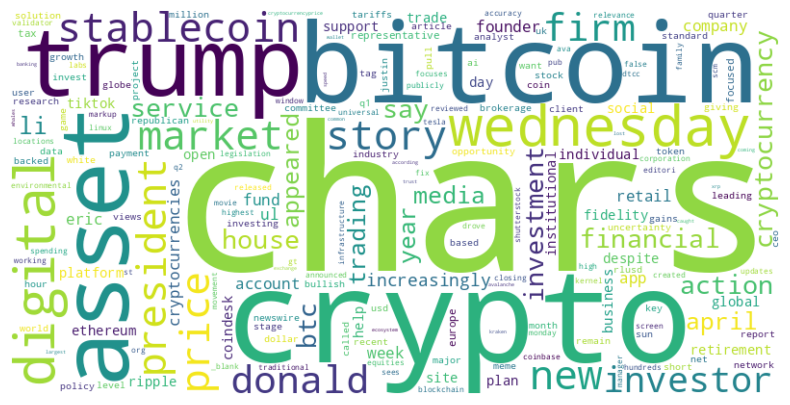

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all keywords into a single string
all_keywords = ' '.join([' '.join(keywords) for keywords in news_df['Keywords'] if keywords])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

In [10]:
# ========================
# 4. Model Building and Evaluation
# ========================

# For demonstration, we will implement three different models:
# Model 1: ARIMA (Time-Series Model)
# Model 2: LSTM (Deep Learning Model)
# Model 3: Random Forest Regressor (Machine Learning Model)
# We will use the crypto 'Close' price as the target.

# 4.1 ARIMA Model
import statsmodels.api as sm

# For ARIMA, we need to determine order (p, d, q)
# Here, we use a simple configuration. In practice, you'd use grid search or AIC minimization.
arima_order = (5, 1, 0)
train_size = int(len(crypto_data) * 0.8)
train_data, test_data = crypto_data['Close'][:train_size], crypto_data['Close'][train_size:]

arima_model = sm.tsa.ARIMA(train_data, order=arima_order)
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test_data))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
# 4.2 LSTM Model
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data[['Close']].values)

# Create sequences
def create_sequences(data, seq_length=50):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        xs.append(data[i:i+seq_length])
        ys.append(data[i+seq_length])
    return np.array(xs), np.array(ys)

seq_length = 50
X, y = create_sequences(scaled_data, seq_length)
train_size_lstm = int(0.8 * len(X))
X_train, X_test = X[:train_size_lstm], X[train_size_lstm:]
y_train, y_test = y[:train_size_lstm], y[train_size_lstm:]

# Build the LSTM model
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test)


Epoch 1/10
38/38 [==============================] - 6s 30ms/step - loss: 0.0128
Epoch 2/10
38/38 [==============================] - 1s 31ms/step - loss: 0.0011
Epoch 3/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0010
Epoch 4/10
38/38 [==============================] - 1s 24ms/step - loss: 9.5819e-04
Epoch 5/10
38/38 [==============================] - 1s 24ms/step - loss: 8.6182e-04
Epoch 6/10
38/38 [==============================] - 1s 25ms/step - loss: 9.9230e-04
Epoch 7/10
38/38 [==============================] - 1s 24ms/step - loss: 7.4599e-04
Epoch 8/10
38/38 [==============================] - 1s 23ms/step - loss: 7.0587e-04
Epoch 9/10
38/38 [==============================] - 1s 24ms/step - loss: 6.7621e-04
Epoch 10/10
10/10 [==============================] - 1s 8ms/step


In [12]:

# 4.3 Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Feature engineering for Random Forest using technical indicators
rf_features = crypto_data[['Close', 'SMA_20', 'EMA_20', 'RSI']]
rf_target = crypto_data['Close']
rf_train_features = rf_features.iloc[:train_size]
rf_test_features = rf_features.iloc[train_size:]
rf_train_target = rf_target.iloc[:train_size]
rf_test_target = rf_target.iloc[train_size:]

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(rf_train_features, rf_train_target)
rf_predictions = rf_model.predict(rf_test_features)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [13]:
# Evaluate models using MSE and MAE
arima_mse = mean_squared_error(test_data, arima_forecast)
rf_mse = mean_squared_error(rf_test_target, rf_predictions)
lstm_mse = mean_squared_error(y_test_actual, lstm_predictions)

print("Model Evaluation Metrics:")
print("ARIMA MSE: ", arima_mse)
print("Random Forest MSE: ", rf_mse)
print("LSTM MSE: ", lstm_mse)


Model Evaluation Metrics:
ARIMA MSE:  361503910.90421563
Random Forest MSE:  247407606.83056605
LSTM MSE:  15903443.19466264


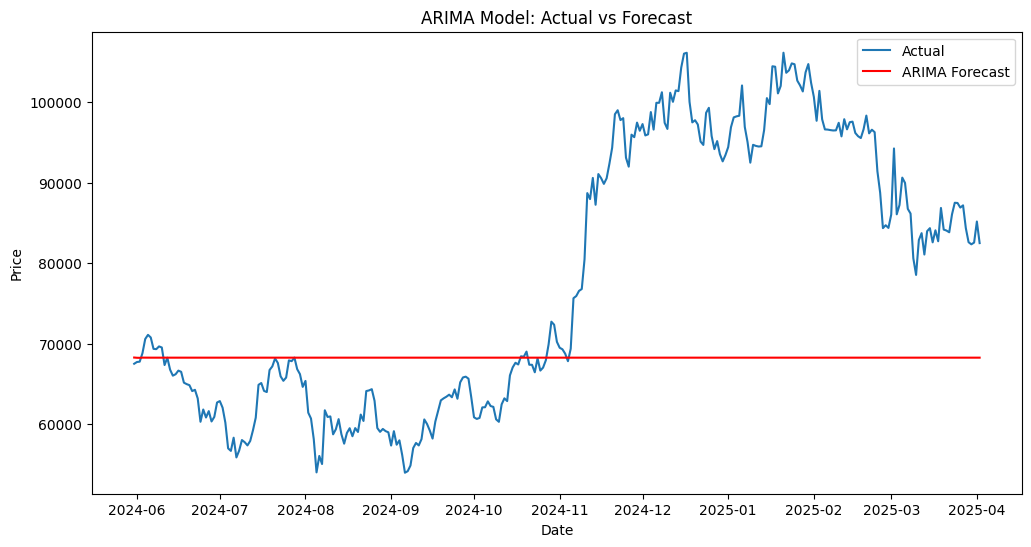

In [14]:
# ========================
# 5. Visualization of Results
# ========================

# Plot Actual vs Forecast for ARIMA
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



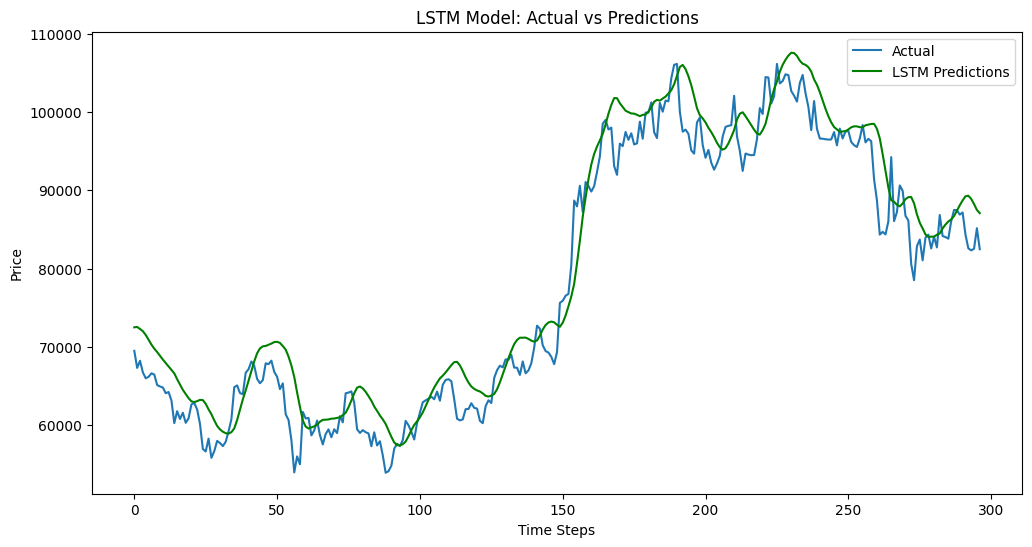

In [15]:
# Plot LSTM Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual')
plt.plot(range(len(lstm_predictions)), lstm_predictions, label='LSTM Predictions', color='green')
plt.title('LSTM Model: Actual vs Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()



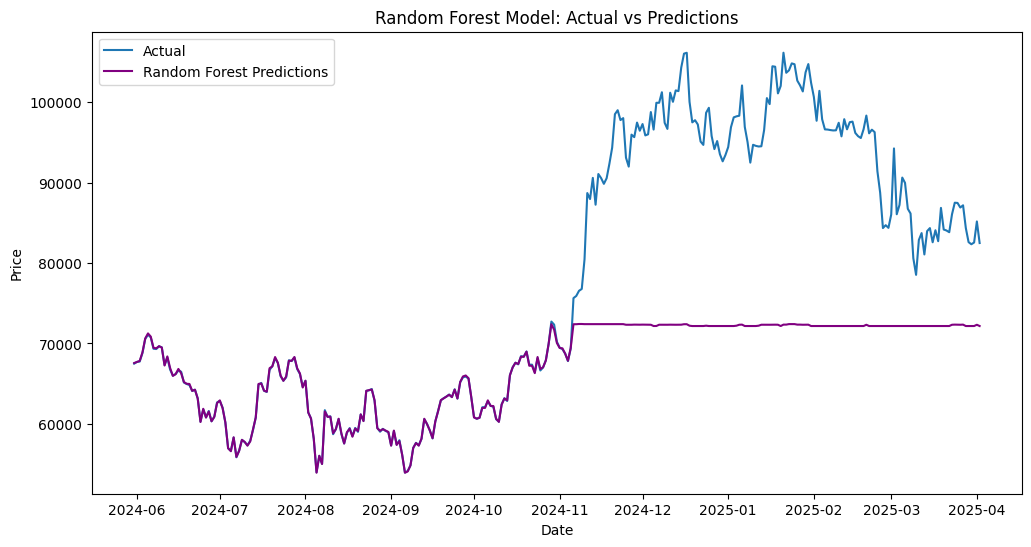

In [16]:
# Plot Random Forest Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.plot(rf_test_target.index, rf_test_target, label='Actual')
plt.plot(rf_test_target.index, rf_predictions, label='Random Forest Predictions', color='purple')
plt.title('Random Forest Model: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [17]:
# Comparison of Model Performance Metrics
performance_metrics = pd.DataFrame({
    'Model': ['ARIMA', 'LSTM', 'Random Forest'],
    'MSE': [arima_mse, lstm_mse, rf_mse]
})
print("Comparison of Model Performance:")
print(performance_metrics)

# Visualize performance metrics using Plotly
fig = go.Figure([go.Bar(x=performance_metrics['Model'], y=performance_metrics['MSE'], text=performance_metrics['MSE'], textposition='auto')])
fig.update_layout(title='Model Performance Comparison (MSE)', xaxis_title='Model', yaxis_title='Mean Squared Error')
fig.show()


Comparison of Model Performance:
           Model           MSE
0          ARIMA  3.615039e+08
1           LSTM  1.590344e+07
2  Random Forest  2.474076e+08


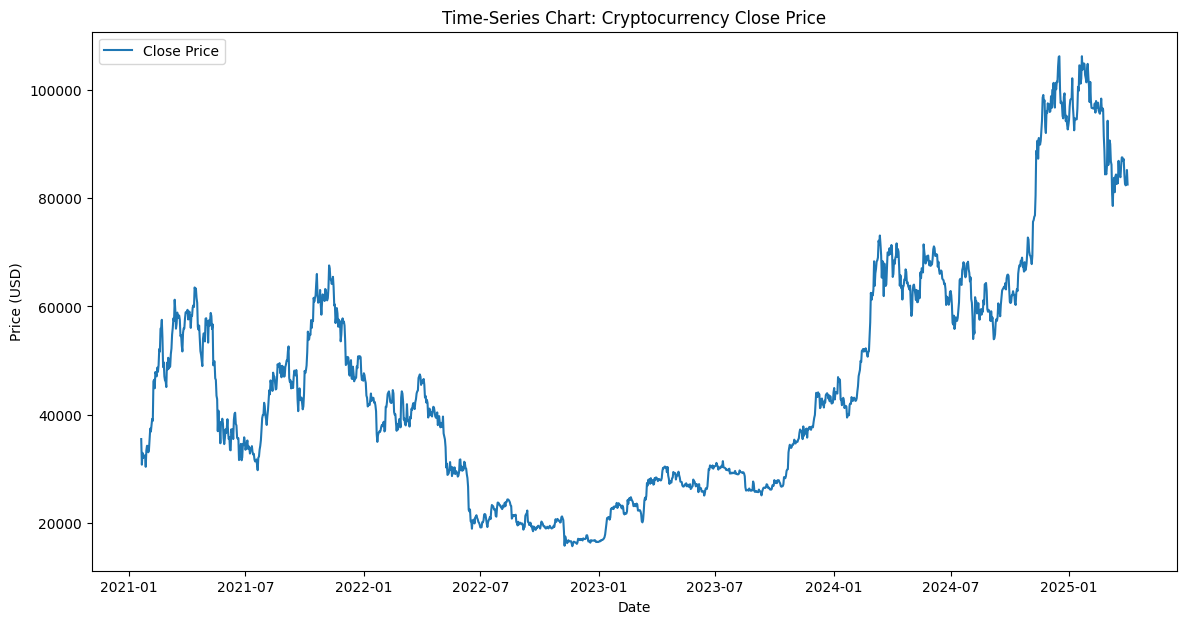

In [18]:
# ========================
# 4. Visualizations for the Crypto Dataset
# ========================

# 4.1 Time-Series Chart of OHLC Data
plt.figure(figsize=(14, 7))
plt.plot(crypto_data.index, crypto_data['Close'], label='Close Price')
plt.title('Time-Series Chart: Cryptocurrency Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



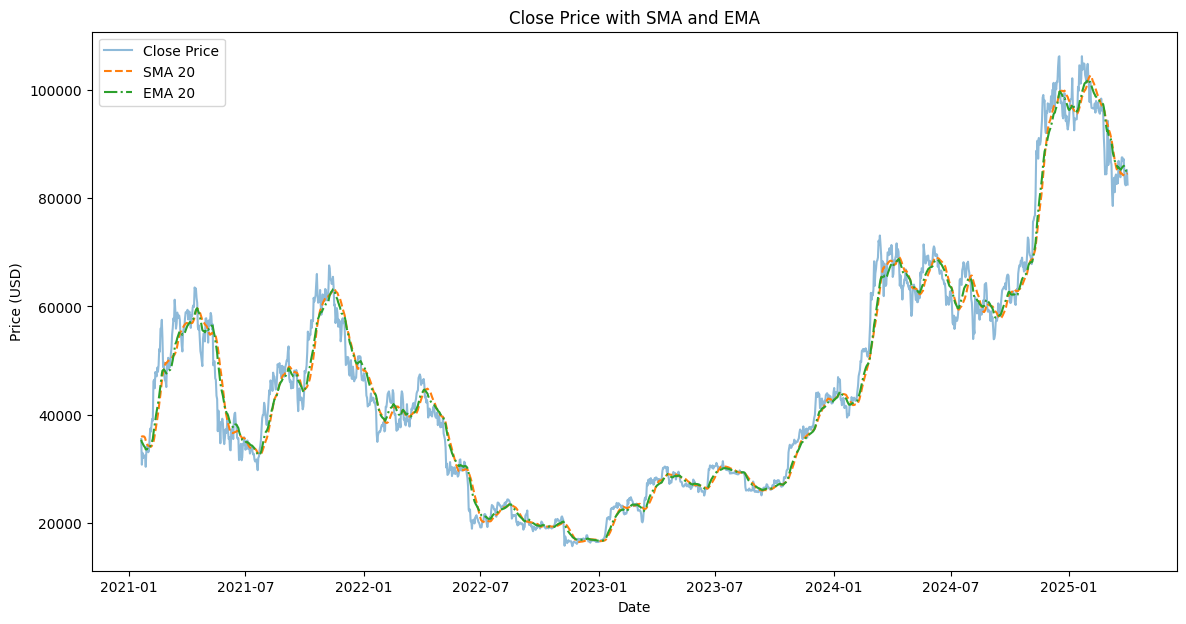

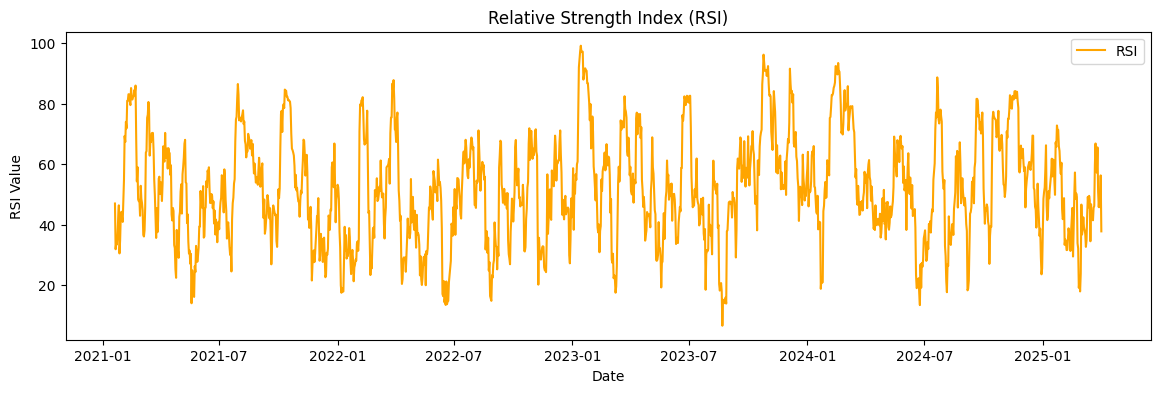

In [19]:

# 4.3 Indicator Charts
# Plot SMA and EMA with the Close Price
plt.figure(figsize=(14, 7))
plt.plot(crypto_data.index, crypto_data['Close'], label='Close Price', alpha=0.5)
plt.plot(crypto_data.index, crypto_data['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(crypto_data.index, crypto_data['EMA_20'], label='EMA 20', linestyle='-.')
plt.title('Close Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot RSI in a separate subplot
plt.figure(figsize=(14, 4))
plt.plot(crypto_data.index, crypto_data['RSI'], label='RSI', color='orange')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.show()


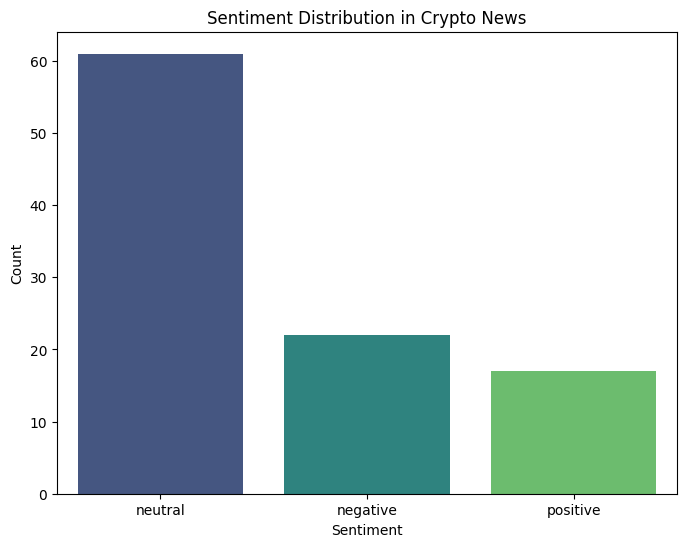

In [20]:
# ========================
# 5. Visualization for News Data Sentiment Distribution
# ========================

import seaborn as sns

# Plot sentiment distribution using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=news_df, palette='viridis')
plt.title('Sentiment Distribution in Crypto News')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



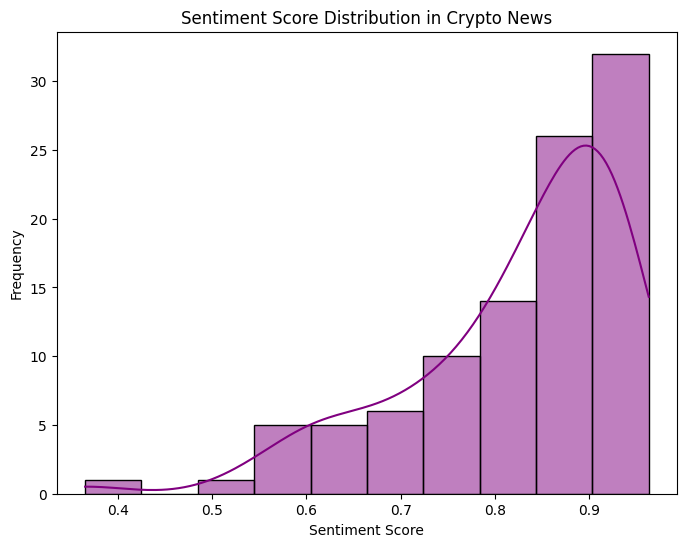

In [21]:

# Also visualize sentiment scores distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(news_df['sentiment_score'], kde=True, color='purple')
plt.title('Sentiment Score Distribution in Crypto News')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [22]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# ========================
# 1. Load Crypto Data
# ========================
crypto_data.columns = [col[0] for col in crypto_data.columns]

# Ensure Date is the index if not already
crypto_data.index = pd.to_datetime(crypto_data.index)  # Convert index to datetime if needed

# Keep only OHLC columns
crypto_data = crypto_data[['Open', 'High', 'Low', 'Close']].dropna()

print(" Data Loaded Successfully\n", crypto_data.tail())

# Split into train and test sets
train_data = crypto_data.iloc[:-100]  # All except last 100 days
test_data = crypto_data.iloc[-100:].copy()  # Last 100 days as test data


 Data Loaded Successfully
                     Open          High           Low         Close
Date                                                              
2025-03-29  84352.070312  84567.335938  81634.140625  82597.585938
2025-03-30  82596.984375  83505.000000  81573.250000  82334.523438
2025-03-31  82336.062500  83870.125000  81293.890625  82548.914062
2025-04-01  82551.921875  85487.367188  82429.359375  85169.171875
2025-04-02  85180.609375  88466.953125  82343.539062  82485.710938


In [23]:

# ========================
# 2. Train ARIMA Model
# ========================
# We use ARIMA on 'Close' prices for forecasting
model = ARIMA(train_data['Close'], order=(5,1,0))  # ARIMA(p,d,q) -> Autoregressive(5), Differencing(1), Moving Average(0)
model_fit = model.fit()

# Forecast next 100 days
predicted_close = model_fit.forecast(steps=100)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [24]:

# ========================
# 3. Create Predicted OHLC Data
# ========================
predicted_data = test_data.copy()
predicted_data['Close'] = predicted_close.values  # Replace actual close with predicted values

# Adjust 'High' and 'Low' based on predicted close
predicted_data['High'] = predicted_data[['Open', 'Close']].max(axis=1) * (1 + 0.005)
predicted_data['Low'] = predicted_data[['Open', 'Close']].min(axis=1) * (1 - 0.005)


In [25]:

# ========================
# 4. Plot Actual Candlestick Chart
# ========================
fig_actual = go.Figure(data=[go.Candlestick(
    x=test_data.index,
    open=test_data['Open'],
    high=test_data['High'],
    low=test_data['Low'],
    close=test_data['Close'],
    name='Actual'
)])
fig_actual.update_layout(title='Actual Candlestick Chart', xaxis_title='Date', yaxis_title='Price (USD)')


In [26]:

# ========================
# 5. Plot Predicted Candlestick Chart
# ========================
fig_predicted = go.Figure(data=[go.Candlestick(
    x=predicted_data.index,
    open=predicted_data['Open'],
    high=predicted_data['High'],
    low=predicted_data['Low'],
    close=predicted_data['Close'],
    name='Predicted',
    increasing_line_color='cyan', decreasing_line_color='magenta',
    opacity=0.7
)])
fig_predicted.update_layout(title='Predicted Candlestick Chart', xaxis_title='Date', yaxis_title='Price (USD)')


In [27]:

# ========================
# 6. Overlay Both Charts for Comparison
# ========================
fig_combined = go.Figure(data=[
    go.Candlestick(
        x=test_data.index,
        open=test_data['Open'],
        high=test_data['High'],
        low=test_data['Low'],
        close=test_data['Close'],
        name='Actual'
    ),
    go.Candlestick(
        x=predicted_data.index,
        open=predicted_data['Open'],
        high=predicted_data['High'],
        low=predicted_data['Low'],
        close=predicted_data['Close'],
        name='Predicted',
        increasing_line_color='cyan',
        decreasing_line_color='magenta',
        opacity=0.7
    )
])
fig_combined.update_layout(title='Comparison: Actual vs Predicted Candlestick Chart',
                           xaxis_title='Date', yaxis_title='Price (USD)')
fig_combined.show()


In [28]:
crypto_data.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

## **LSTM Model Analysis**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(crypto_data)

# Create training dataset (use past 60 days to predict next day)
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Split into train & test sets (80% train, 20% test)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

print(f"✅ Data Shape: X_train={X_train.shape}, X_test={X_test.shape}")


✅ Data Shape: X_train=(1179, 60, 4), X_test=(295, 60, 4)


In [30]:
# ========================
# 2. Build LSTM Model
# ========================

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 4)), # Changed input_shape to (seq_length, 4)
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(4)  # Predict all OHLC values
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
print(" LSTM Model Built Successfully")

 LSTM Model Built Successfully


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [31]:

# ========================
# 3. Train Model
# ========================
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ========================
# 4. Generate Predictions
# ========================
predicted_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_scaled)




Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0177 - val_loss: 0.0068
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0026 - val_loss: 0.0085
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0018 - val_loss: 0.0051
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0016 - val_loss: 0.0059
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0

In [32]:
# Actual prices for comparison
# Reshape y_test to have 4 columns before inverse transform
actual_prices = scaler.inverse_transform(y_test)

# If you only need the 'Close' price, extract it after inverse transform
actual_close_prices = actual_prices[:, 3]  # Assuming 'Close' is the 4th column (index 3)

# Convert test dataset index
test_dates = crypto_data.index[-len(actual_prices):]

In [33]:
# Create a DataFrame for plotting
predicted_df = pd.DataFrame({'Date': test_dates,
                            'Actual_Open': actual_prices[:, 0],
                            'Actual_High': actual_prices[:, 1],
                            'Actual_Low': actual_prices[:, 2],
                            'Actual_Close': actual_prices[:, 3],
                            'Predicted_Open': predicted_prices[:, 0],
                            'Predicted_High': predicted_prices[:, 1],
                            'Predicted_Low': predicted_prices[:, 2],
                            'Predicted_Close': predicted_prices[:, 3]})
predicted_df.set_index('Date', inplace=True)

print(" Predictions Generated Successfully\n", predicted_df.tail())

 Predictions Generated Successfully
              Actual_Open   Actual_High    Actual_Low  Actual_Close  \
Date                                                                 
2025-03-29  84352.070312  84567.335938  81634.140625  82597.585938   
2025-03-30  82596.984375  83505.000000  81573.250000  82334.523438   
2025-03-31  82336.062500  83870.125000  81293.890625  82548.914062   
2025-04-01  82551.921875  85487.367188  82429.359375  85169.171875   
2025-04-02  85180.609375  88466.953125  82343.539063  82485.710938   

            Predicted_Open  Predicted_High  Predicted_Low  Predicted_Close  
Date                                                                        
2025-03-29    84269.468750    86011.914062   81945.195312     83579.507812  
2025-03-30    82226.210938    83919.718750   79824.320312     81547.031250  
2025-03-31    81247.843750    82920.468750   78870.648438     80573.671875  
2025-04-01    81325.453125    83001.312500   79031.578125     80648.835938  
2025-04-02

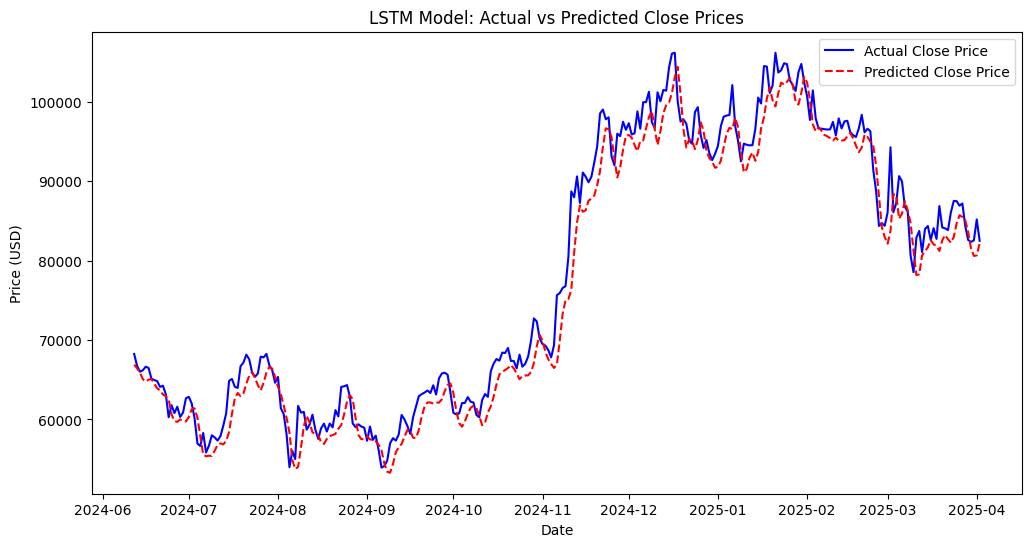

In [34]:
# ========================
# 5. Plot Actual vs. Predicted Close Prices
# ========================
plt.figure(figsize=(12, 6))
plt.plot(predicted_df['Actual_Close'], label="Actual Close Price", color="blue") # Changed 'Actual' to 'Actual_Close'
plt.plot(predicted_df['Predicted_Close'], label="Predicted Close Price", color="red", linestyle="dashed") # Changed 'Predicted' to 'Predicted_Close'
plt.title("LSTM Model: Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [35]:
# ========================
# 6. Create Predicted Candlestick Chart
# ========================
test_data = crypto_data.iloc[-len(actual_prices):].copy()  # Extract last test period

# Add predicted Close prices to the test dataset
test_data['Predicted_Close'] = predicted_df['Predicted_Close'] # Changed 'Predicted' to 'Predicted_Close'

# Adjust High & Low for predicted data
test_data['Predicted_High'] = test_data[['Open', 'Predicted_Close']].max(axis=1) * (1 + 0.005)
test_data['Predicted_Low'] = test_data[['Open', 'Predicted_Close']].min(axis=1) * (1 - 0.005)

# Actual Candlestick Chart
fig_actual = go.Figure(data=[go.Candlestick(
    x=test_data.index,
    open=test_data['Open'],
    high=test_data['High'],
    low=test_data['Low'],
    close=test_data['Close'],
    name="Actual"
)])

In [36]:

# Predicted Candlestick Chart (Overlayed)
fig_actual.add_trace(go.Candlestick(
    x=test_data.index,
    open=test_data['Open'],
    high=test_data['Predicted_High'],
    low=test_data['Predicted_Low'],
    close=test_data['Predicted_Close'],
    name="Predicted",
    increasing_line_color="cyan",
    decreasing_line_color="magenta",
    opacity=0.7
))

fig_actual.update_layout(title="Comparison: Actual vs Predicted Candlestick Chart",
                         xaxis_title="Date", yaxis_title="Price (USD)")
fig_actual.show()